In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

CoverTree with Friends
======================

Suppose we have `N` data points in `R^k` stored in `X` which is a numpy.ndarray array with shape `N`-by-`k`.
In this example, we have loaded `X` from the file `tests/circle.npy`, which contains `N=1000` data points in `R^2`.

In [2]:
import numpy as np
X = np.load('../tests/circle.npy')
print(X.shape)
print(X.dtype)

(1000, 2)
float64


To construct a Cover Tree of `X`, we must first wrap the array in a
`multidim.PointCloud` object. (Footnote [1])  Then, we initialize a
`multidim.covertree.CoverTree` object from the PointCloud:



Footnotes:

[1] This is very cheap computationally.  It simply references the array :code:`X` in memory and allows use of some convenience functions and operations in the style of `pandas.DataFrame` objects.

[2] Supervised Learning of Labeled Pointcloud Differences via Cover-Tree Entropy Reduction. https://arxiv.org/abs/1702.07959


In [3]:
import multidim, multidim.covertree
pc_of_X = multidim.PointCloud(X)
ct_of_X = multidim.covertree.CoverTree(pc_of_X)

The Cover Tree construction occurs level-by-level, as requested.

In [4]:
ct_of_X

A CoverTree of 1000 points in dimension 2, computed to
level	adults
0	1

In [5]:
ct_of_X[0]

Level 0 using 1 adults at radius 1.871749785062669

In [6]:
ct_of_X[2]  # Level 2 is requested, so Levels 1 and 2 will be generated NOW

Level 2 using 48 adults at radius 0.3211414923789028

In [7]:
ct_of_X

A CoverTree of 1000 points in dimension 2, computed to
level	adults
0	1
1	12
2	48

In [8]:
for level in ct_of_X:
    print(level)  # generate all levels, re-using levels already cached

Level 0 using 1 adults at radius 1.871749785062669
Level 1 using 12 adults at radius 0.775304146341883
Level 2 using 48 adults at radius 0.3211414923789028
Level 3 using 179 adults at radius 0.13302116158407748
Level 4 using 520 adults at radius 0.055099169210747825
Level 5 using 842 adults at radius 0.02282282316258181
Level 6 using 970 adults at radius 0.0094535228855842
Level 7 using 993 adults at radius 0.003915777391413413
Level 8 using 999 adults at radius 0.0016219681027573748
Level 9 using 1000 adults at radius 0.0006718411858986625


The algorithm stopped at level 9, because the points were fully separated.  We can force it to go further by requesting a later level.

In [9]:
ct_of_X[12]  # Fully isolated, so there is no reason to go to level 12

Level 12 using 1000 adults at radius 4.774628300292392e-05

Each layer keeps track of all of the information defined in the paper [2]_,
using the indices of the original datapoints in the original array :code:`X`.

In [10]:
ct_of_X[1].adults  # A list of indices of adults, in birth order

[781, 351, 81, 550, 747, 900, 429, 196, 863, 290, 106, 489]

In [11]:
X[ct_of_X[1].adults,:]

array([[ 0.15764103, -0.2343529 ],
       [-0.28915672,  0.46662217],
       [ 0.56706421,  0.4583803 ],
       [-0.6245674 , -0.36512975],
       [-0.0855821 , -0.97444076],
       [ 0.97970988, -0.23248864],
       [-1.05547013,  0.31218114],
       [ 0.11806301,  1.18280362],
       [ 0.69272922, -0.97948315],
       [-0.65670668,  1.15138602],
       [ 0.97155952,  1.12253835],
       [-1.46023518, -0.42265171]])

In [12]:
ct_of_X[1].friends1[781]  # A list of indices of other adults, in index order

[81, 106, 196, 290, 351, 429, 489, 550, 747, 781, 863, 900]

In [13]:
ct_of_X[1].friends2[781]  # A list of indices of other adults, in index order

[81, 106, 196, 290, 351, 429, 489, 550, 747, 781, 863, 900]

In [14]:
ct_of_X[1].friends3[781]  # A list of indices of other adults, in index order

[81, 106, 196, 290, 351, 429, 489, 550, 747, 781, 863, 900]

In [15]:
kids = ct_of_X[1].children[196]  # A boolean flag for each of the N points
print(kids.dtype)
print(kids.shape)
print(np.where(kids))
print(X[kids,:])

bool
(1000,)
(array([141, 149, 150, 151, 156, 165, 167, 169, 173, 174, 175, 176, 177,
       179, 180, 184, 185, 189, 190, 196, 197, 198, 199, 200, 201, 204,
       205, 207, 209, 210, 211, 212, 214, 215, 216, 217, 218, 220, 221,
       222, 223, 224, 225, 228, 230, 231, 232, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 253, 254,
       256, 257, 259, 260, 261, 265, 267, 268, 271, 272, 273, 275, 276,
       277, 279, 282, 284, 285, 287, 288, 289, 291, 292, 295, 301, 302,
       303, 304, 309, 333]),)
[[  3.69959054e-01   9.07928236e-01]
 [  4.54650893e-01   9.82868333e-01]
 [  1.94909364e-01   8.70666399e-01]
 [  1.60072110e-01   7.55356978e-01]
 [  3.78181984e-01   1.00430286e+00]
 [  1.26868203e-01   8.88137645e-01]
 [  1.92315308e-01   8.69705024e-01]
 [  3.55150059e-01   8.32850974e-01]
 [  2.44360255e-01   1.14818982e+00]
 [  4.36909903e-01   1.02094308e+00]
 [  3.42564387e-01   8.89102841e-01]
 [  2.94483533e-01   9.86904220e-01]
 [  4.03

We can plot the original PointCloud, along with some cover-tree balls

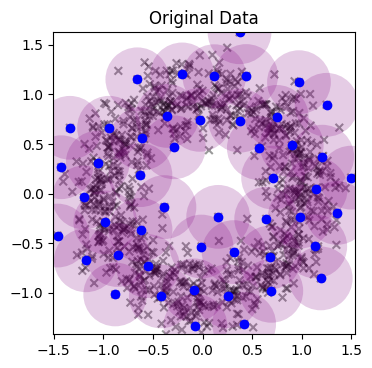

In [16]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
pc_of_X.plot(ax, title="Original Data")
ct_of_X[2].plot(ax)
plt.show()

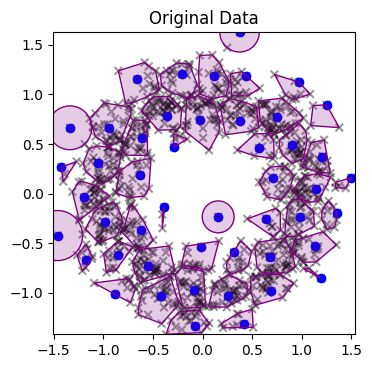

In [17]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
pc_of_X.plot(ax, title="Original Data")
ct_of_X[2].plot(ax, show_hulls=True, show_balls=False)
plt.show()

Manually plot the children of a particular adult

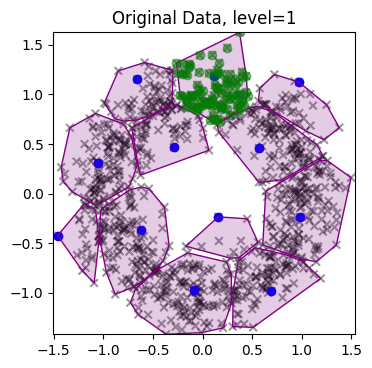

In [19]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
pc_of_X.plot(ax, title="Original Data, level=1")
ct_of_X[1].plot(ax, show_hulls=True, show_balls=False)
ax.scatter(x=X[kids,0], y=X[kids,1], color='green', alpha=0.5)
plt.show()